Dữ liệu bạn cung cấp liên quan đến giao dịch chứng khoán của mã cổ phiếu. Sau đây là ý nghĩa của từng cột:

> **`Ticker:`**
Mã chứng khoán đại diện cho một công ty trên thị trường chứng khoán. Ví dụ: "FPT" là mã của Tập đoàn FPT.

> **`Date/Time:`**
Thời điểm diễn ra giao dịch, bao gồm ngày và giờ (giờ phút cụ thể).
Ví dụ: "12/25/2018 9:15" có nghĩa là giao dịch diễn ra vào lúc 9 giờ 15 phút ngày 25 tháng 12 năm 2018.

> **`Open:`**
Giá mở cửa trong khoảng thời gian được ghi nhận, tức là giá đầu tiên của cổ phiếu trong khung thời gian đó.
Ví dụ: Giá mở cửa tại 9:15 là 30.89.

> **`High:`**
Giá cao nhất của cổ phiếu trong khoảng thời gian được ghi nhận.
Ví dụ: Tại 9:16, giá cao nhất là 30.81.

> **`Low:`**
Giá thấp nhất của cổ phiếu trong khoảng thời gian được ghi nhận.
Ví dụ: Tại 9:21, giá thấp nhất là 30.59.

> **`Close`**:
Giá đóng cửa trong khoảng thời gian được ghi nhận, tức là giá cuối cùng của cổ phiếu trong khung thời gian đó.
Ví dụ: Giá đóng cửa tại 9:15 là 30.89.

> **`Volume:`**
Số lượng cổ phiếu được giao dịch trong khoảng thời gian đó.
Ví dụ: Tại 9:18, khối lượng giao dịch là 2120 cổ phiếu.

> **`Open Interest:`**
Số lượng hợp đồng phái sinh chưa được tất toán (dành cho giao dịch hợp đồng tương lai hoặc quyền chọn).
Trong trường hợp này, tất cả giá trị "Open Interest" đều bằng 0, có thể do dữ liệu bạn cung cấp chỉ liên quan đến cổ phiếu cơ bản chứ không phải các sản phẩm phái sinh.


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
df_fpt = pd.read_csv('/content/drive/MyDrive/test/FPT.csv')
df_msn = pd.read_csv('/content/drive/MyDrive/test/MSN.csv')
df_pnj = pd.read_csv('/content/drive/MyDrive/test/PNJ.csv')
df_vic = pd.read_csv('/content/drive/MyDrive/test/VIC.csv')
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [121]:
df_fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [122]:
df_fpt.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [123]:
df_fpt.isnull().sum()

,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


In [124]:
df_fpt.columns

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

In [125]:
df_fpt['Date/Time'] = pd.to_datetime(df_fpt['Date/Time'])
df_fpt = df_fpt.drop(columns=['Open Interest'])
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500


In [126]:

# Tính khoảng cách thời gian giữa các dòng liên tiếp
df_fpt['Time_Diff'] = df_fpt['Date/Time'].diff().dt.total_seconds() / 60  # chuyển sang phút

# Kiểm tra các giá trị không bằng 1 phút
non_continuous = df_fpt[df_fpt['Time_Diff'] != 1]

# Hiển thị các dòng không liên tục và thông tin thống kê
print("Số lượng khoảng thời gian không liên tục:", len(non_continuous))



Số lượng khoảng thời gian không liên tục: 11506


In [127]:
df_fpt.shape

(97406, 8)

In [128]:
# Tạo bản sao để merge
df_fpt_shifted = df_fpt[["Date/Time", "Close"]].copy()

num_days_to_shift = [1,3,5]

for days in num_days_to_shift:
  df_fpt[f"Price After {days} days"] = pd.merge_asof(
      df_fpt, df_fpt_shifted,
      left_on=df_fpt["Date/Time"] + pd.Timedelta(days=days),  # Time + n days
      right_on="Date/Time",
      direction="backward"
  )["Close_y"]
  df_fpt[f"Price Fluctuations {days} days"] = df_fpt[f"Price After {days} days"] - df_fpt["Close"]



In [129]:
features = ['Date/Time' , 'Close', 'Price Fluctuations 1 days','Price Fluctuations 3 days','Price Fluctuations 5 days']
df_fpt[features].isnull().sum()

,0
Date/Time,0
Close,0
Price Fluctuations 1 days,0
Price Fluctuations 3 days,0
Price Fluctuations 5 days,0


In [130]:
df_fpt[features].head()

,Date/Time,Close,Price Fluctuations 1 days,Price Fluctuations 3 days,Price Fluctuations 5 days
0,2018-12-25 09:15:00,30.89,0.22,0.45,0.60
1,2018-12-25 09:16:00,30.81,0.38,0.41,0.68
2,2018-12-25 09:17:00,30.74,0.45,0.60,0.75
3,2018-12-25 09:18:00,30.74,0.41,0.60,0.75
4,2018-12-25 09:19:00,30.74,0.37,0.60,0.75


### EDA

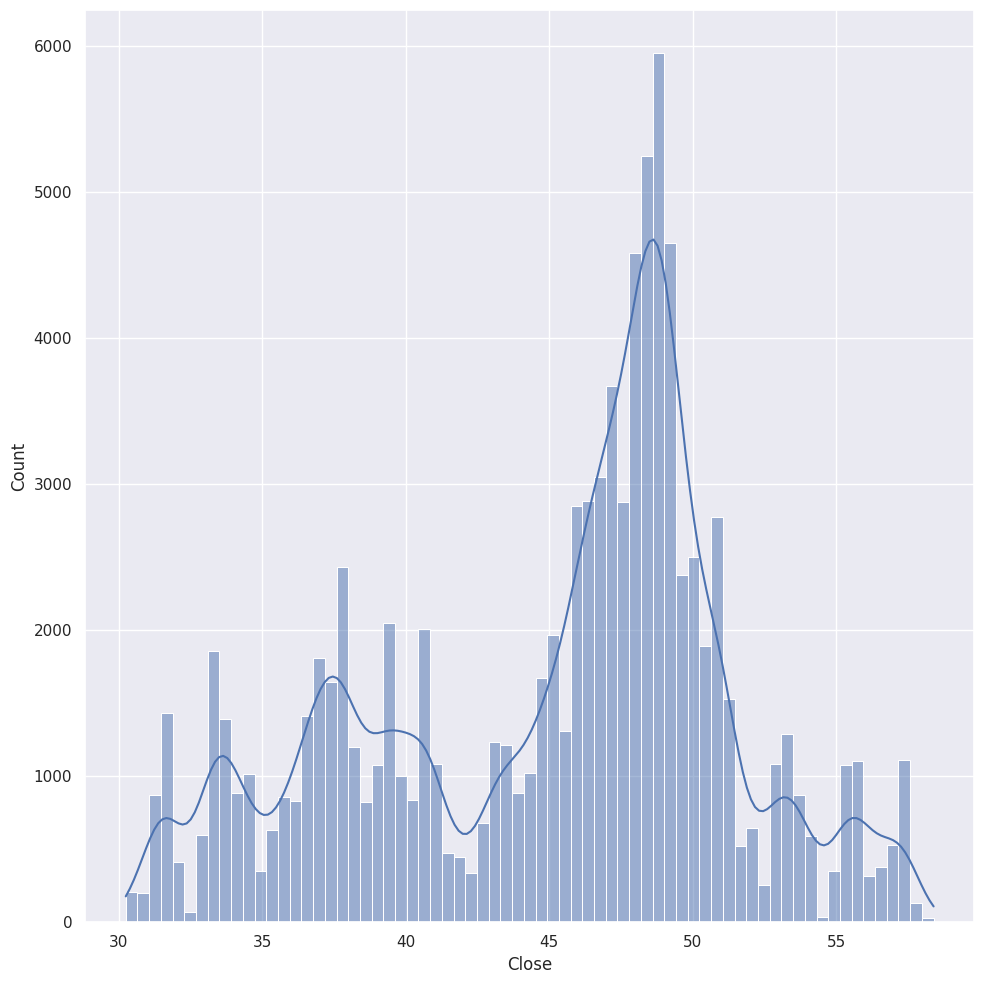

In [131]:
fig, ax = plt.subplots( figsize=(10, 10))

# Plotting each histogram on respective axes
sns.histplot(data=df_fpt, x='Close', kde=True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [132]:
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.histplot(data=df_fpt, x='Volume')
# plt.show()

In [133]:
# sns.boxplot(data=df_fpt, y='Volume')
# ax.set_title('Boxplot of Volume')


In [134]:
# df_fpt['Volume'].describe()

In [135]:
# # Áp dụng thang log cho dữ liệu Volume
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.histplot(data=df_fpt, x=np.log10(df_fpt['Volume']))
# ax.set_title('Histogram of Volume (Log Scale)')
# ax.set_xlabel('Log(Volume)')
# plt.show()

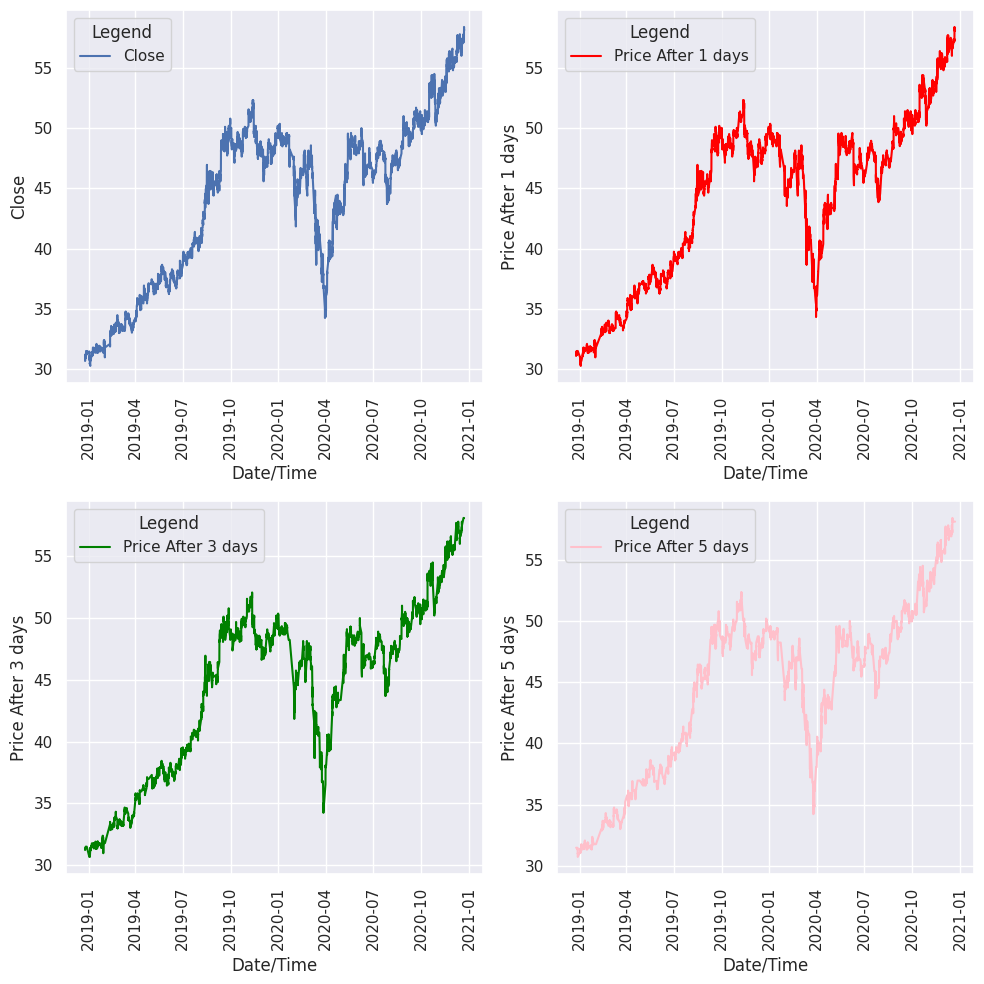

In [136]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

# Vẽ biểu đồ đường với độ trong suốt alpha
sns.lineplot(data=df_fpt, x='Date/Time', y='Close', label='Close', alpha=1, ax=ax[0,0])
sns.lineplot(data=df_fpt, x='Date/Time', y='Price After 1 days', label='Price After 1 days',color='red', ax=ax[0,1])
sns.lineplot(data=df_fpt, x='Date/Time', y='Price After 3 days', label='Price After 3 days',color='green', ax=ax[1,0])
sns.lineplot(data=df_fpt, x='Date/Time', y='Price After 5 days', label='Price After 5 days',color='pink', ax=ax[1,1])


# Hiển thị chú thích (legend) cho từng axes
ax[0, 0].legend(title='Legend', loc='upper left')
ax[0, 1].legend(title='Legend', loc='upper left')
ax[1, 0].legend(title='Legend', loc='upper left')
ax[1, 1].legend(title='Legend', loc='upper left')
for ax_i in ax.flatten():  # Lặp qua tất cả các axes trong mảng 2x2
    ax_i.tick_params(axis='x', rotation=90)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


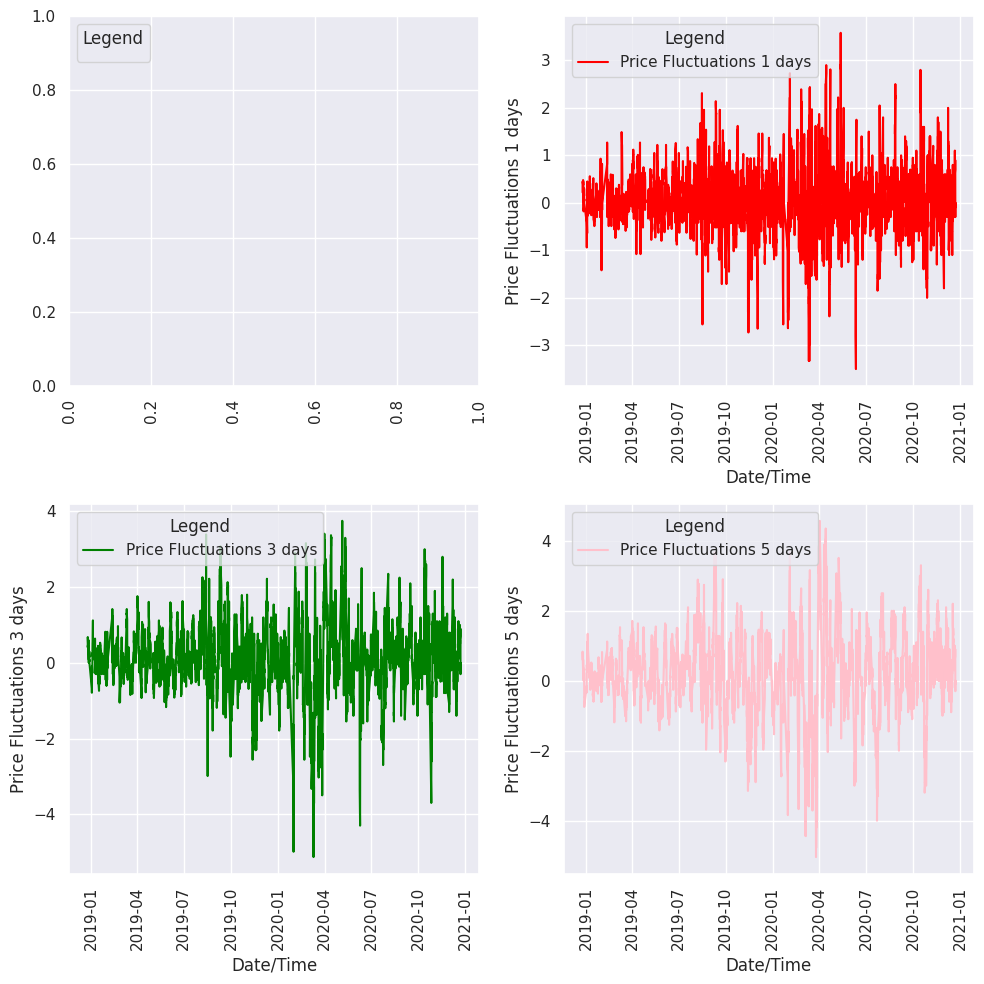

In [137]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

# Vẽ biểu đồ đường với độ trong suốt alpha
# sns.lineplot(data=df_fpt, x='Date/Time', y='Close', label='Close', alpha=1, ax=ax[0,0])
sns.lineplot(data=df_fpt, x='Date/Time', y='Price Fluctuations 1 days', label='Price Fluctuations 1 days',color='red', ax=ax[0,1])
sns.lineplot(data=df_fpt, x='Date/Time', y='Price Fluctuations 3 days', label='Price Fluctuations 3 days',color='green', ax=ax[1,0])
sns.lineplot(data=df_fpt, x='Date/Time', y='Price Fluctuations 5 days', label='Price Fluctuations 5 days',color='pink', ax=ax[1,1])


# Hiển thị chú thích (legend) cho từng axes
ax[0, 0].legend(title='Legend', loc='upper left')
ax[0, 1].legend(title='Legend', loc='upper left')
ax[1, 0].legend(title='Legend', loc='upper left')
ax[1, 1].legend(title='Legend', loc='upper left')
for ax_i in ax.flatten():  # Lặp qua tất cả các axes trong mảng 2x2
    ax_i.tick_params(axis='x', rotation=90)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [138]:
df_fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Ticker                     97406 non-null  object        
 1   Date/Time                  97406 non-null  datetime64[ns]
 2   Open                       97406 non-null  float64       
 3   High                       97406 non-null  float64       
 4   Low                        97406 non-null  float64       
 5   Close                      97406 non-null  float64       
 6   Volume                     97406 non-null  int64         
 7   Time_Diff                  97405 non-null  float64       
 8   Price After 1 days         97406 non-null  float64       
 9   Price Fluctuations 1 days  97406 non-null  float64       
 10  Price After 3 days         97406 non-null  float64       
 11  Price Fluctuations 3 days  97406 non-null  float64       
 12  Pric

In [139]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Chọn các cột cần thiết
features = ['Close','Volume','Open','High','Close']
target = ['Price Fluctuations 1 days','Price Fluctuations 3 days','Price Fluctuations 5 days']

df_new = df_fpt[features + target]

# Chia dữ liệu thành train, validation, test
train_size = int(len(df_new) * 0.7)
valid_size = int(len(df_new) * 0.15)

df_new_train = df_new.iloc[:train_size]
df_new_valid = df_new.iloc[train_size:train_size + valid_size]
df_new_test = df_new.iloc[train_size + valid_size:]


In [140]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Áp dụng scaler cho các features của tập train
scaler_features = scaler.fit(df_new_train[features])  # Chỉ fit trên tập train


train_scaled = scaler_features.transform(df_new_train[features])
valid_scaled = scaler_features.transform(df_new_valid[features])
test_scaled = scaler_features.transform(df_new_test[features])

y_train = df_new_train[target].values
y_valid = df_new_valid[target].values
y_test = df_new_test[target].values

In [141]:
# Tạo chuỗi thời gian
def create_sequences(data, target, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(train_scaled, y_train, time_steps)
X_valid, y_valid = create_sequences(valid_scaled, y_valid, time_steps)
X_test, y_test = create_sequences(test_scaled, y_test, time_steps)

# Kiểm tra kích thước đầu ra
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (68124, 60, 7)
X_valid shape: (14550, 60, 7)
X_test shape: (14552, 60, 7)


In [142]:
y_train

array([[ 0.15,  0.34,  0.34],
       [ 0.15,  0.34,  0.34],
       [ 0.07,  0.34,  0.34],
       ...,
       [-3.3 , -1.55, -2.15],
       [-3.3 , -1.6 , -2.2 ],
       [-3.3 , -1.6 , -2.3 ]])

In [143]:
X_train.shape[2]

7

In [144]:

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(3)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Huấn luyện mô hình
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,953 (124.82 KB)

 Trainable params: 31,953 (124.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 137s 63ms/step - loss: 0.9260 - mae: 0.6754 - val_loss: 0.8167 - val_mae: 0.6488
Epoch 2/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 140s 62ms/step - loss: 0.9068 - mae: 0.6684 - val_loss: 0.7650 - val_mae: 0.6293
Epoch 3/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - loss: 0.8864 - mae: 0.6620 - val_loss: 0.7705 - val_mae: 0.6288
Epoch 4/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - loss: 0.8385 - mae: 0.6489 - val_loss: 0.7688 - val_mae: 0.6404
Epoch 5/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - loss: 0.8083 - mae: 0.6401 - val_loss: 0.8165 - val_mae: 0.6489
Epoch 6/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 137s 64ms/step - loss: 0.8161 - mae: 0.6410 - val_loss: 0.7671 - val_mae: 0.6372
Epoch 7/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - loss: 0.7742 - mae: 0.6287 - val_loss: 0.7894 - val_mae: 0.6599
Epoch 8/50
2129/2129 ━━━━━━━━━━━━━━━━━━━━ 133s 62ms/step - loss: 0.7731 - mae: 0.6259 - val_loss: 0.8355 - val_mae: 0.6755
Epoch 9/50
2129/

In [151]:
# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

455/455 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 1.5847 - mae: 0.9273
Test Loss: 2.673827886581421
Test MAE: 1.2894021272659302
455/455 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step


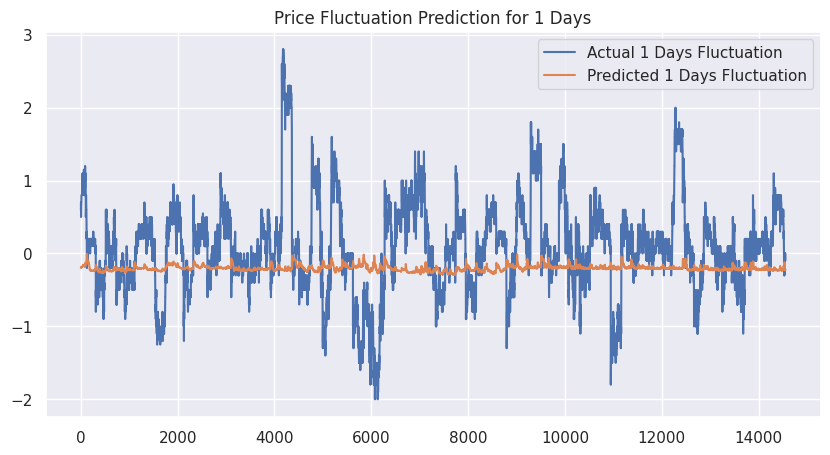

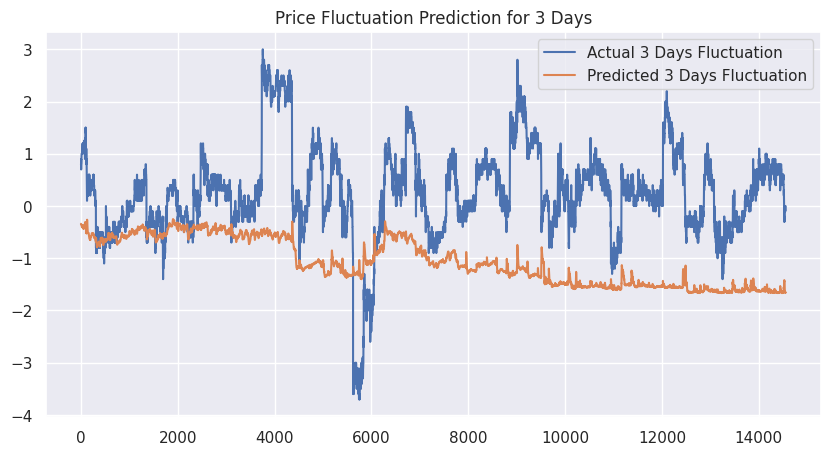

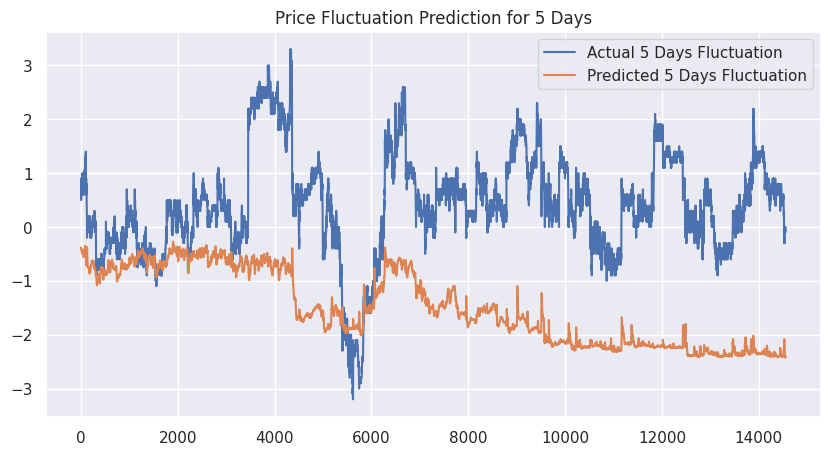

In [146]:
# So sánh giá trị thực tế và dự đoán
for i, days in enumerate([1, 3, 5]):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f"Actual {days} Days Fluctuation")
    plt.plot(y_pred[:, i], label=f"Predicted {days} Days Fluctuation")
    plt.legend()
    plt.title(f"Price Fluctuation Prediction for {days} Days")
    plt.show()

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính các metric
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In kết quả
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 1.2894019033406394
MSE: 2.6738266318228114
R²: -2.3055868823667036


In [148]:
y_valid

array([[-2.6 , -1.55, -2.  ],
       [-2.6 , -1.5 , -2.  ],
       [-2.6 , -1.5 , -2.  ],
       ...,
       [ 0.9 ,  1.  ,  0.8 ],
       [ 1.  ,  1.  ,  0.8 ],
       [ 1.  ,  1.  ,  0.8 ]])